# Combined Analysis


In [40]:
import pandas as pd

# Import cleaned data from csv file
df = pd.read_csv(
    "./combined_results.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date_1",
        "preferred_entry_date_2",
        "preferred_entry_date_3",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df.head()

/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_16867/3232396230.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,preferred_entry_date_1,preferred_zone_1,preferred_entry_date_2,preferred_zone_2,preferred_entry_date_3,preferred_zone_3,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,year,minimum_acceptable_group_size_1,minimum_acceptable_group_size_2,minimum_acceptable_group_size_3,processing_sequence,state
0,2020-06-26,Colchuck Zone,2020-06-26,Core Enchantment Zone,2020-07-10,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
1,2020-08-01,Core Enchantment Zone,2020-09-12,Core Enchantment Zone,2020-06-21,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
2,2020-09-19,Core Enchantment Zone,2020-09-12,Core Enchantment Zone,2020-09-26,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
3,2020-08-22,Core Enchantment Zone,2020-09-17,Core Enchantment Zone,2020-09-18,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
4,2020-07-17,Snow Zone,2020-07-24,Colchuck Zone,2020-07-17,Core Enchantment Zone,Awarded,1,2020-07-17,Snow Zone,6,2020,0.0,0.0,0.0,,


## Full Application Analysis


In [41]:
# Get the total number of applications in the dataset
total_applications = len(df)

# Print the result
print(f"Total number of applications: {total_applications}")

Total number of applications: 140122


In [42]:
# Get the total number of awarded permits
total_awarded = len(df[df["results_status"] == "Awarded"])

# Print the result
print(f"Total number of awarded permits: {total_awarded}")

Total number of awarded permits: 10015


In [43]:
# Probability of getting an awarded permit
probability_awarded = total_awarded / total_applications

# Print the result
print(
    f"Probability of getting an awarded permit: {probability_awarded:.2%} ({total_awarded}/{total_applications})"
)

Probability of getting an awarded permit: 7.15% (10015/140122)


In [44]:
# Show awarded permits by awarded status across teh different zones
awarded = df[df["results_status"] == "Awarded"]

# Print the result
print(f"Awarded permits by zone:")

# Sort the results by number Awarded
pd.crosstab(
    awarded["awarded_entrance_code_name"],
    awarded["results_status"],
).sort_values(by="Awarded", ascending=False)

Awarded permits by zone:


results_status,Awarded
awarded_entrance_code_name,
Core Enchantment Zone,2875
Snow Zone,2544
Stuart Zone,1865
Colchuck Zone,1403
Eightmile/Caroline Zone,1112
Eightmile/Caroline Zone (stock),147
Stuart Zone (stock),69


In [45]:
# Probability you were awarded a permit for the Core Enchantment Zone
probability_core_awarded = (
    len(awarded[awarded["awarded_entrance_code_name"] == "Core Enchantment Zone"])
    / total_applications
)

# Print the result
print(
    f"Probability of getting an awarded permit for the Core Enchantment Zone: {probability_core_awarded:.2%}"
)

Probability of getting an awarded permit for the Core Enchantment Zone: 2.05%


In [46]:
# Probability of being awarded a permit given you applied for Core Zone
applied_core_zone_1_filter = df["preferred_zone_1"] == "Core Enchantment Zone"
applied_core_zone_2_filter = df["preferred_zone_2"] == "Core Enchantment Zone"
applied_core_zone_3_filter = df["preferred_zone_3"] == "Core Enchantment Zone"

applied_atleast_one_core_zone_filter = (
    applied_core_zone_1_filter | applied_core_zone_2_filter | applied_core_zone_3_filter
)

applied_core_zone = df[applied_atleast_one_core_zone_filter]

applied_awarded_core_zone = applied_core_zone[
    applied_core_zone["results_status"] == "Awarded"
]

probability_applied_awarded_core_zone = len(applied_awarded_core_zone) / len(
    applied_core_zone
)

# Print the result
print(
    f"Probability of being awarded a permit given you applied for Core Zone: {probability_applied_awarded_core_zone:.2%} ({len(applied_awarded_core_zone)}/{len(applied_core_zone)})"
)

Probability of being awarded a permit given you applied for Core Zone: 5.90% (6878/116517)


In [47]:
# Probability of being awarded a permit given you DID NOT apply for the Core Zone
did_not_apply_core_zone_filter = ~applied_atleast_one_core_zone_filter

did_not_apply_core_zone = df[did_not_apply_core_zone_filter]

did_not_apply_awarded_core_zone = did_not_apply_core_zone[
    did_not_apply_core_zone["results_status"] == "Awarded"
]

probability_did_not_apply_awarded_core_zone = len(
    did_not_apply_awarded_core_zone
) / len(did_not_apply_core_zone)

# Print the result
print(
    f"Probability of being awarded a permit given you DID NOT apply for Core Zone: {probability_did_not_apply_awarded_core_zone:.2%} ({len(did_not_apply_awarded_core_zone)}/{len(did_not_apply_core_zone)})"
)

Probability of being awarded a permit given you DID NOT apply for Core Zone: 13.29% (3137/23605)


In [48]:
# Probability of being awarded a permit given you applied for only the Core Zone
division_2_na_filter = df["preferred_zone_2"] == "N/A"
division_3_na_filter = df["preferred_zone_3"] == "N/A"


only_applied_core_filter = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & applied_core_zone_3_filter
)
only_applied_core_2_filter = (
    applied_core_zone_1_filter & division_2_na_filter & division_3_na_filter
)
only_applied_core_3_filter = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & division_3_na_filter
)

only_applied_core = df[
    only_applied_core_filter | only_applied_core_2_filter | only_applied_core_3_filter
]

only_applied_awarded_core = only_applied_core[
    only_applied_core["results_status"] == "Awarded"
]

probability_only_applied_awarded_core = len(only_applied_awarded_core) / len(
    only_applied_core
)

# Print the result
print(
    f"Probability of being awarded a Core Zone permit given you applied for only the Core Zone: {probability_only_applied_awarded_core:.2%} ({len(only_applied_awarded_core)}/{len(only_applied_core)})"
)

Probability of being awarded a Core Zone permit given you applied for only the Core Zone: 3.06% (2077/67837)


In [49]:
def sort_zone_probabilities(x):
    return x.sort(key=lambda x: x[1], reverse=True)


def create_zone_probability_dataframe(x, columns):
    return pd.DataFrame(
        x,
        columns=columns,
    )


def add_probability_percent_column(df):
    df["Probability (%)"] = df["Probability"].map("{:.2%}".format)
    return df


def zone_probabilities_to_crosstab(x, columns):
    sort_zone_probabilities(x)
    return add_probability_percent_column(create_zone_probability_dataframe(x, columns))

In [50]:
# Get the probability of being awared a permit for a zone given you applied for that zone

# Get a list of all the zones
zones_values = df["preferred_zone_1"].unique()

prob_awarded_zone_applied_for = []

# Loop over the zones and calculate the probability of being awarded a permit for each zone
for zone in zones_values:
    applied_1 = df["preferred_zone_1"] == zone
    applied_2 = df["preferred_zone_2"] == zone
    applied_3 = df["preferred_zone_3"] == zone

    zone_filter = applied_1 | applied_2 | applied_3

    applied_zone = df[zone_filter]

    total_zone = len(applied_zone)

    awarded_zone_filter = df["awarded_entrance_code_name"] == zone

    total_zone_awarded = len(df[zone_filter & awarded_zone_filter])
    prob_zone_awarded = total_zone_awarded / total_zone

    prob_awarded_zone_applied_for.append(
        [zone, prob_zone_awarded, total_zone_awarded, total_zone]
    )

    print(
        f"Probability of being awarded a permit for {zone}, given applied 1+ option in zone: {prob_zone_awarded:.2%} ({total_zone_awarded}/{total_zone})"
    )


df_prob_awarded_zone_applied_for = zone_probabilities_to_crosstab(
    prob_awarded_zone_applied_for,
    ["Zone", "Probability", "Total Awarded", "Total Applied"],
)

# Show crosstab of the new dataframe
df_prob_awarded_zone_applied_for

Probability of being awarded a permit for Colchuck Zone, given applied 1+ option in zone: 3.02% (1403/46481)
Probability of being awarded a permit for Core Enchantment Zone, given applied 1+ option in zone: 2.47% (2875/116517)
Probability of being awarded a permit for Snow Zone, given applied 1+ option in zone: 8.05% (2544/31609)
Probability of being awarded a permit for Eightmile/Caroline Zone (stock), given applied 1+ option in zone: 15.49% (147/949)
Probability of being awarded a permit for Stuart  Zone, given applied 1+ option in zone: 10.72% (1865/17400)
Probability of being awarded a permit for Eightmile/Caroline Zone, given applied 1+ option in zone: 14.52% (1112/7660)
Probability of being awarded a permit for Stuart Zone (stock), given applied 1+ option in zone: 11.15% (69/619)


,Zone,Probability,Total Awarded,Total Applied,Probability (%)
0,Eightmile/Caroline Zone (stock),0.154900,147,949,15.49%
1,Eightmile/Caroline Zone,0.145170,1112,7660,14.52%
2,Stuart Zone (stock),0.111470,69,619,11.15%
3,Stuart Zone,0.107184,1865,17400,10.72%
4,Snow Zone,0.080483,2544,31609,8.05%
5,Colchuck Zone,0.030184,1403,46481,3.02%
6,Core Enchantment Zone,0.024675,2875,116517,2.47%


## Split


In [71]:
# Import split from csv file
# The combined_results_split_actual.csv removes the entries where the applicant
# had already been a awared a permit
#
#
# i.e.,
#
# The applicant had been awarded a permit for their first option. Therefore, their 
# second and third options are removed because they never had a chance at winning because an applicant can 
# only be awarded one permit. 
df_split = pd.read_csv(
    "./combined_results_split_actual.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df_split.head()

/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_16867/3087733875.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_split = pd.read_csv(


,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,year,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Colchuck Zone,2020-06-26,0.0,Unsuccessful,0,1970-01-01,N/A,0,,,2020,False,1,June,Friday
1,Core Enchantment Zone,2020-08-01,0.0,Unsuccessful,0,1970-01-01,N/A,0,,,2020,False,1,August,Saturday
2,Core Enchantment Zone,2020-09-19,0.0,Unsuccessful,0,1970-01-01,N/A,0,,,2020,False,1,September,Saturday
3,Core Enchantment Zone,2020-08-22,0.0,Unsuccessful,0,1970-01-01,N/A,0,,,2020,False,1,August,Saturday
4,Snow Zone,2020-07-17,0.0,Awarded,1,2020-07-17,Snow Zone,6,,,2020,True,1,July,Friday


In [72]:
# Look at dtypes
df_split.dtypes

preferred_zone                           object
preferred_entry_date             datetime64[ns]
minimum_acceptable_group_size           float64
results_status                           object
awarded_preference                        int64
awarded_entry_date               datetime64[ns]
awarded_entrance_code_name               object
awarded_group_size                        int64
processing_sequence                      object
state                                    object
year                                      int64
awarded                                    bool
preferred_option                          int64
preferred_entry_date_month               object
preferred_entry_date_day                 object
dtype: object

## Zone


In [73]:
# Show total split entries by zone
# Print the result
print(f"Total split entries by zone:")
df_split["preferred_zone"].value_counts()

Total split entries by zone:


preferred_zone
Core Enchantment Zone              263202
Colchuck Zone                       63864
Snow Zone                           44715
Stuart  Zone                        24107
Eightmile/Caroline Zone              8936
Eightmile/Caroline Zone (stock)      1074
Stuart Zone (stock)                   669
Name: count, dtype: int64

In [76]:
# Get the total awarded permits by month
awarded_split_filter = df_split["awarded"] == True

df_split_awarded = df_split[awarded_split_filter]

In [77]:
# Show total awarded permits by zone in a dataframe
df_awarded_zone = (
    df_split_awarded["preferred_zone"].value_counts().to_frame(name="Total Awarded")
)

df_awarded_zone

,Total Awarded
preferred_zone,
Core Enchantment Zone,2875
Snow Zone,2544
Stuart Zone,1865
Colchuck Zone,1403
Eightmile/Caroline Zone,1112
Eightmile/Caroline Zone (stock),147
Stuart Zone (stock),69


## Month


In [78]:
# Show total entries by month
df_split["preferred_entry_date_month"].value_counts()

preferred_entry_date_month
August       146713
July         107834
September     94306
June          34864
October       16620
May            6230
Name: count, dtype: int64

In [79]:
# Group awarded by month
df_awarded_by_month = (
    df_split_awarded.groupby("preferred_entry_date_month")["awarded"]
    .count()
    .to_frame(name="Total Awarded")
)

df_awarded_by_month

,Total Awarded
preferred_entry_date_month,
August,1971
July,1968
June,1857
May,966
October,1370
September,1883


## Day of the week


In [80]:
# Show total entries by day of the week
df_split["preferred_entry_date_day"].value_counts()

preferred_entry_date_day
Friday       92831
Thursday     69450
Saturday     62110
Monday       51886
Wednesday    49240
Tuesday      46087
Sunday       34963
Name: count, dtype: int64

In [81]:
# Get the total awarded permit entries by day of the week
df_awarded_by_day = (
    df_split_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_awarded_by_day

,Total Awarded
preferred_entry_date_day,
Sunday,1798
Saturday,1397
Monday,1394
Friday,1393
Thursday,1360
Tuesday,1347
Wednesday,1326


## Core Enchantment Zone


In [82]:
# Filter the df_split dataframe for only entries for Core Enchantment Zone
core_filter = df_split["preferred_zone"] == "Core Enchantment Zone"

df_split_core = df_split[core_filter]

# Filter the df_split_core dataframe for only awarded entries
awarded_filter = df_split_core["awarded"] == True

df_split_core_awarded = df_split_core[awarded_filter]

### Month


In [83]:
# Show the total entries by month for Core Enchantment Zone
df_split_core["preferred_entry_date_month"].value_counts()

preferred_entry_date_month
August       95634
July         68152
September    63043
June         20673
October      12145
May           3555
Name: count, dtype: int64

In [84]:
# Get the Core Enchantment Zone entries awarded by month and create a dataframe
df_core_awarded_by_month = (
    df_split_core_awarded.groupby("preferred_entry_date_month")["awarded"]
    .count()
    .to_frame(name="Total Awarded")
)

df_core_awarded_by_month

,Total Awarded
preferred_entry_date_month,
August,539
July,528
June,499
May,298
October,504
September,507


### Day of the Week


In [109]:
# Get the total entries awarded by day of the week in the Core Zone
df_core_awarded_by_day = (
    df_split_core_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Awarded")
)

df_core_awarded_by_day

,Awarded
preferred_entry_date_day,
Sunday,536
Tuesday,418
Monday,418
Saturday,384
Wednesday,383
Thursday,368
Friday,368


### Group Size


In [86]:
# Show total entries by group size for Core Enchantment Zone removing the N/A values
df_split_core["minimum_acceptable_group_size"].value_counts()

minimum_acceptable_group_size
4.0    63719
0.0    49665
8.0    41449
2.0    38909
6.0    36365
5.0    14206
3.0    13707
1.0     2601
7.0     2581
Name: count, dtype: int64

In [87]:
# Get the total number of awarded permits by group size in Core Enchantment Zone
df_core_awarded_by_group_size = (
    df_split_core_awarded["minimum_acceptable_group_size"][df_split_core_awarded["minimum_acceptable_group_size"] > 0]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_core_awarded_by_group_size

,Total Awarded
minimum_acceptable_group_size,
4.0,598
2.0,591
8.0,271
6.0,250
1.0,184
3.0,153
5.0,108
7.0,28


### Entrance awarded by day of the week in August for Core Enchantment Zone


In [88]:
# Filter the df_split_core dataframe for August entries
august_filter = df_split_core["preferred_entry_date_month"] == "August"

df_split_core_august = df_split_core[august_filter]

# Filter the df_split_core_august dataframe for only awarded entries
awarded_august_filter = df_split_core_august["awarded"] == True

df_split_core_august_awarded = df_split_core_august[awarded_august_filter]

# Sum the awarded_group_size column by day of the week
df_core_august_awarded_by_day = (
    df_split_core_august_awarded.groupby("preferred_entry_date_day")[
        "awarded_group_size"
    ]
    .sum()
    .to_frame(name="Awarded Sunday Entrance in August Core Zone")
)

# Add column totaling the number of occurences each day had in August, i.e., August had 4 Sundays
df_core_august_awarded_by_day["Total Days"] = df_split_core_august_awarded.groupby(
    "preferred_entry_date_day"
)["preferred_entry_date"].nunique()

# Calculate the average group size for each day of the week in August
df_core_august_awarded_by_day["Average Awarded/Day"] = (
    df_core_august_awarded_by_day["Awarded Sunday Entrance in August Core Zone"]
    / df_core_august_awarded_by_day["Total Days"]
)

# Sort by Awarded Sunday Entrance in August Core Zone
df_core_august_awarded_by_day = df_core_august_awarded_by_day.sort_values(
    by="Awarded Sunday Entrance in August Core Zone", ascending=False
)

df_core_august_awarded_by_day

,Awarded Sunday Entrance in August Core Zone,Total Days,Average Awarded/Day
preferred_entry_date_day,,,
Sunday,407,13,31.307692
Monday,304,14,21.714286
Tuesday,304,14,21.714286
Wednesday,304,14,21.714286
Saturday,272,13,20.923077
Thursday,272,13,20.923077
Friday,256,12,21.333333


### Awarded group size on Sunday in August for Core Enchantment Zone


In [101]:
# Filter the August data for only Sundays
sunday_filter = df_split_core_august_awarded["preferred_entry_date_day"] == "Sunday"

df_split_core_august_awarded_sunday = df_split_core_august_awarded[sunday_filter]

# Get the total number of awarded permits by group size in Core Enchantment Zone for August Sundays
df_core_august_sunday_awarded_by_group_size = (
    df_split_core_august_awarded_sunday["awarded_group_size"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_core_august_sunday_awarded_by_group_size

,Total Awarded
awarded_group_size,
2,28
4,23
8,13
6,11
5,9
1,8
3,5
7,3


## Visualizations

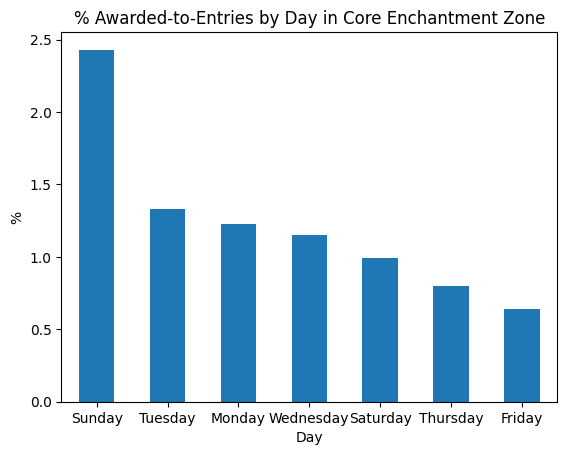

In [124]:
# Show bar chart of the total number of permits awared by day us df_core_awarded_by_day
import matplotlib.pyplot as plt

# Create a ratio between the total number of permits awarded by day and total number entries per day
df_core_awarded_by_day["Entries"] = df_split_core["preferred_entry_date_day"].value_counts()

df_core_awarded_by_day["%"] = round((df_core_awarded_by_day["Awarded"] / df_core_awarded_by_day["Entries"]) * 100, 2)

# Sort the dataframe by the "%" column
df_core_awarded_by_day = df_core_awarded_by_day.sort_values(by="%", ascending=False)

df_core_awarded_by_day["%"].plot(kind="bar", legend=False)
plt.title("% Awarded-to-Entries by Day in Core Enchantment Zone")
plt.ylabel("%")
plt.xlabel("Day")
plt.xticks(rotation=0)
plt.show()



In [106]:
# Show bar chart of the total number of permits awared by day us df_core_awarded_by_day
import matplotlib.pyplot as plt

# Create a ratio between the total number of permits awarded by day and total number entries per day
df_core_awarded_by_day["Entries"] = df_split_core["preferred_entry_date_day"].value_counts()

df_core_awarded_by_day["%"] = round((df_core_awarded_by_day["Awarded"] / df_core_awarded_by_day["Entries"]) * 100, 2)

# Sort the dataframe by the "%" column
df_core_awarded_by_day = df_core_awarded_by_day.sort_values(by="%", ascending=False)

df_core_awarded_by_day["%"].plot(kind="bar", legend=False)
plt.title("% Permits Awarded to Entries by Day in Core Enchantment Zone")
plt.ylabel("%")
plt.xlabel("Day")
plt.xticks(rotation=0)
plt.show()

,Awarded,Entries,%
preferred_entry_date_day,,,
Sunday,536.0,22094.0,2.43
Tuesday,418.0,31407.0,1.33
Monday,418.0,33877.0,1.23
Saturday,384.0,38782.0,0.99
Wednesday,383.0,33403.0,1.15
Thursday,368.0,45809.0,0.80
Friday,368.0,57830.0,0.64
Total,2875.0,263202.0,8.57


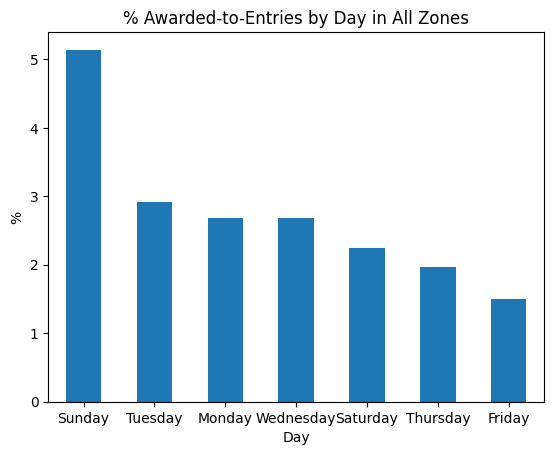

In [125]:
# Create a ratio between the total number of permits awarded by day and total number entries per day
df_awarded_by_day["Entries"] = df_split["preferred_entry_date_day"].value_counts()

df_awarded_by_day["%"] = round((df_awarded_by_day["Total Awarded"] / df_awarded_by_day["Entries"]) * 100, 2)

# Sort the dataframe by the "%" column
df_awarded_by_day = df_awarded_by_day.sort_values(by="%", ascending=False)

df_awarded_by_day["%"].plot(kind="bar", legend=False)
plt.title("% Awarded-to-Entries by Day in All Zones")
plt.ylabel("%")
plt.xlabel("Day")
plt.xticks(rotation=0)
plt.show()

In [122]:
df_awarded_by_day

,Total Awarded,Entries,%
preferred_entry_date_day,,,
Sunday,1798,34963,5.14
Tuesday,1347,46087,2.92
Monday,1394,51886,2.69
Wednesday,1326,49240,2.69
Saturday,1397,62110,2.25
Thursday,1360,69450,1.96
Friday,1393,92831,1.50
